# KNN - k 최근접 이웃 회귀 ( K- Nearest Neighbors )
- 거리기반에서 가장 가까운 k개 이웃을 찾고, k개의 정답의 평균을 계산하여 예측 (k는 주로 홀수 사용)
- 영화 평점 데이터를 예시로 생각하면
- 단순히 평균으로 잡게 되면 예측 정확도가 떨어질 수 있어서, 가중치를 잡아서 평점을 예측한다
- 가중평균을 이용하여 거리가 가까울수록 더 데이터가 유사할 것이라고 보고 가중치 부여
- ex)
  - A 영화 5.0 / 새로운 값까지 거리가 3.2
  - B 영화 7.0 / 새로운 값까지 거리가 10.5
  - C 영화 9.5 / 새로운 값까지 거리가 1.1

In [2]:
# 새로운 데이터 값의 3개의 기준의 평점이 아래와 같으면 아래의 평균으로 대체한다.
print((5.0+7.0+9.5)/3)
#가중평균 개념으로 하면 오히려 1.1에 까가운 평점 9.5 영향을 받아서 해당 x값은 더 높게 나온다.
print((5.0/3.2+7.0/10.5+9.5/1.1) / (1/3.2+1/10.5+1/1.1))

7.166666666666667
8.25128415861927


# KNN의 한계
- 거리기반이다보니 기존에 학습할 데이터에서 벗어난 범위들은 정확하게 예측하기 어려움

In [3]:
import numpy as np
x1 = np.arange(1,11)
x = x1.reshape(-1,1)
y = np.arange(1,11)*5

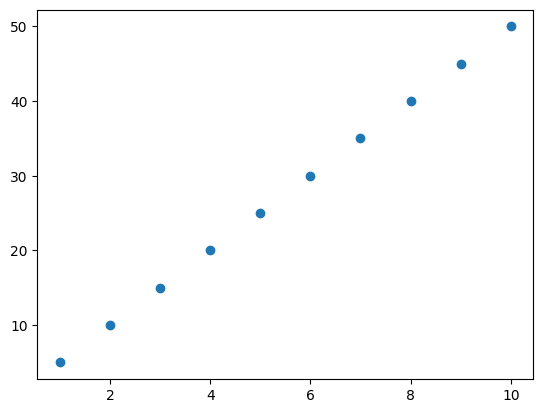

In [4]:
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x,y)
plt.show()

In [5]:
from sklearn.neighbors import KNeighborsRegressor
# 최근접 이웃 2개를 기준으로 결정하는 알고리즘
knn_re =KNeighborsRegressor(n_neighbors = 2).fit(x,y)
# 7을 입력. 예상되는 값을 출력
print(knn_re.predict([[7]]))

[32.5]


In [6]:
# 2와 10간의 간격은 8인데 값 차이는 40이 나오고
# 10과 100의 간격은 90인데 값 차이는 동일하게 나온다?!
print(knn_re.predict([[10]]))
print(knn_re.predict([[15]]))
print(knn_re.predict([[20]]))
print(knn_re.predict([[100]]))

[47.5]
[47.5]
[47.5]
[47.5]


# KNN- Parameters
- n_neighbors : 이웃의 개수
- weight : 가중평균 개념. uniform ( 디폴트 ), distance( 거리기반의 가중치 )
- algorithm : ball_tree, kd_tree, brute (거리기반이고 차원이 많아지면 데이터를 탐색하는 시간이 오래걸린다. 해당 데이터를 탐색하는 방법에 따라서 어떻게 할 것인가. ) (left_size 트리구조로 데이터를 찾다보니 최소한 몇 개의 가지치기 개념으로 찾을 것인가 )
- metrics 디폴트 : 민코프스키 유클리디안거리 p =2
- 민코프스키거리 - p =1 맨하탄, p=2 유클리디안, p=3 체피쇼프 거리기반
- n_jobs : 사용할 cpu 개수. 디폴트는 -1

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import neighbors

np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()

# Add noise to targets
y[::5] += 1 * (0.5 - np.random.rand(8))

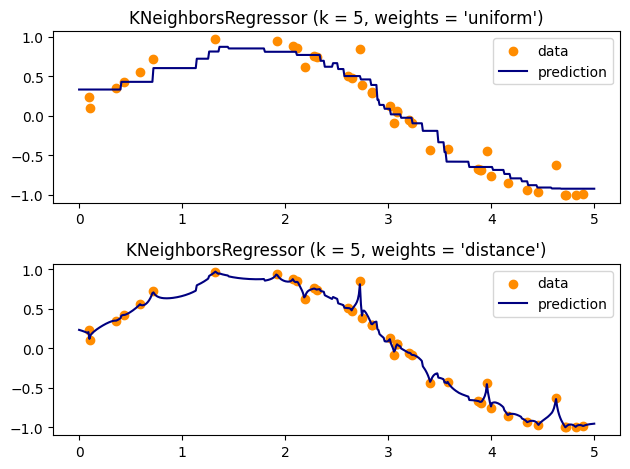

In [8]:
n_neighbors = 5

for i, weights in enumerate(["uniform", "distance"]):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, color="darkorange", label="data")
    plt.plot(T, y_, color="navy", label="prediction")
    plt.axis("tight")
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors, weights))

plt.tight_layout()
plt.show()

# 캘리포니아 집값 데이터로 KNN - 이웃회귀 해보자!::

In [11]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn import neighbors
from sklearn.model_selection import train_test_split
dataset = datasets.fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['target'] = dataset.target
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [12]:
data = df[['MedInc','HouseAge']]
target = df['target']
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=111)

## n을 조절하면서 어떻게 변화하는지 체크해보자!

In [13]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [ ]:
# Rmse 값이 점차 감소했다가 다시 증가하네!!
rmse_val = []
for K in range(150):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)
print(min(rmse_val))

<Axes: >

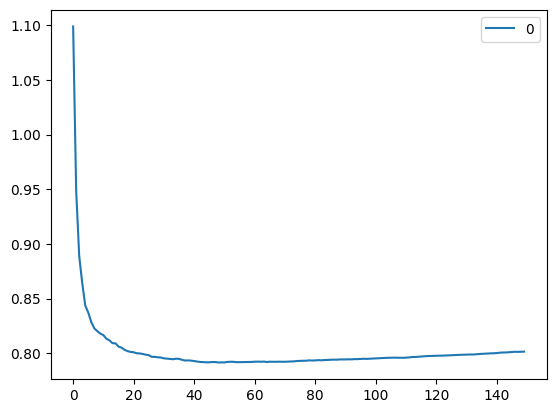

In [15]:
curve1 = pd.DataFrame(rmse_val)
curve1.plot()

In [16]:
rmse_val = []
for K in range(150):
    K = K+1
    # weight distance로 설정
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance')
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
    print('Rmse ',K,'=',error)

Rmse  1 = 1.0989294648183063
Rmse  2 = 0.9911084156692753
Rmse  3 = 0.949091415196653
Rmse  4 = 0.9297245541837981
Rmse  5 = 0.9155581442143063
Rmse  6 = 0.9074687030366
Rmse  7 = 0.8999577960275005
Rmse  8 = 0.8950172716957903
Rmse  9 = 0.8918025544578485
Rmse  10 = 0.8887016280507243
Rmse  11 = 0.8859362545277166
Rmse  12 = 0.8832489165416517
Rmse  13 = 0.8813095947981116
Rmse  14 = 0.8791523002700207
Rmse  15 = 0.8778259862751803
Rmse  16 = 0.8757941353241235
Rmse  17 = 0.8744161263379255
Rmse  18 = 0.8730283223094161
Rmse  19 = 0.8718390175055392
Rmse  20 = 0.8708902973128466
Rmse  21 = 0.8700790553925475
Rmse  22 = 0.8691152592187168
Rmse  23 = 0.8684116829877304
Rmse  24 = 0.8676653920558944
Rmse  25 = 0.8668137929740902
Rmse  26 = 0.866085983524995
Rmse  27 = 0.8650922112080959
Rmse  28 = 0.864563278790566
Rmse  29 = 0.8638672735845885
Rmse  30 = 0.8632622685376947
Rmse  31 = 0.8626618460071703
Rmse  32 = 0.862098753051255
Rmse  33 = 0.8615729279821582
Rmse  34 = 0.8611086900067

- 이웃을 150개 이상 잡고 숫자가 계속 커지게 되면 평균으로 회귀하게 된다!
- 평균에 대해서 결국 값을 대체하게 되는 것이고 전체 평균으로 점점 가지고 가게 된다

<Axes: >

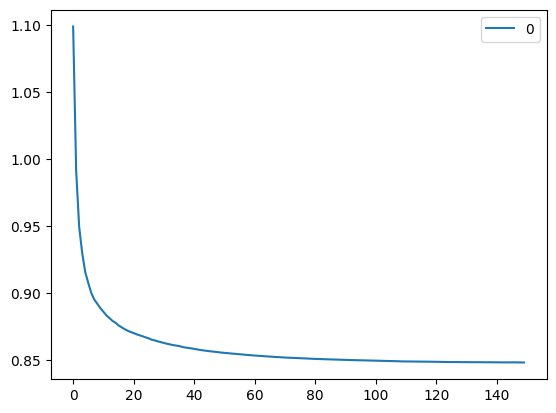

In [17]:
curve1 = pd.DataFrame(rmse_val)
curve1.plot()

<Axes: >

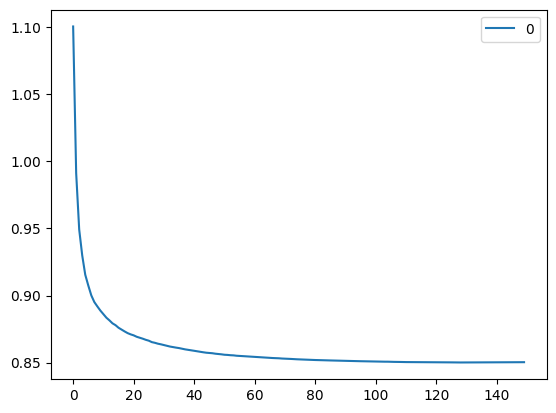

In [18]:
rmse_val = []
for K in range(150):
    K = K+1
    # weight distance로 설정, p=1로 설정
    model = neighbors.KNeighborsRegressor(n_neighbors = K, weights ='distance',p=1)
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    error = sqrt(mean_squared_error(y_test, pred))
    rmse_val.append(error)
   # print('Rmse ',K,'=',error)
curve3 = pd.DataFrame(rmse_val)
curve3.plot()

# 결국 K값을 어떤 값으로 지정하는게 가장 좋은가?
- 그럼 KNN 모델을 통해서 단순하게 최소의 RMSE 나온 것이 가장 뛰어난 모델이라고 말할 수 있는가?
- KNN 이웃 수 50개 이상으로 해서 최적의 모델을 도출했다 끝?
- 현재는 두 가지 칼럼만 사용했지만 나머지 칼럼까지 사용하게 되면 차원은 더 늘어나게 되고, 이후는 어떻게 변화게 되는지 필수과제에서 확인!